In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
train = pd.read_csv('dataset/titan/train.csv')
test = pd.read_csv('dataset/titan/test.csv')
test.head()

PassengerId  Pclass                                          name     sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    age  SibSp  parch   ticket     fare cabin embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
name           891 non-null object
sex            891 non-null object
age            714 non-null float64
SibSp          891 non-null int64
parch          891 non-null int64
ticket         891 non-null object
fare           891 non-null float64
cabin          204 non-null object
embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
name           418 non-null object
sex            418 non-null object
age            332 non-null float64
SibSp          418 non-null int64
parch          418 non-null int64
ticket         418 non-null object
fare           417 non-null float64
cabin          91 non-null object
embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
survived = train['Survived']

df = pd.concat([train.drop('Survived',axis=1),test])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
name           1309 non-null object
sex            1309 non-null object
age            1046 non-null float64
SibSp          1309 non-null int64
parch          1309 non-null int64
ticket         1309 non-null object
fare           1308 non-null float64
cabin          295 non-null object
embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [8]:
df.isnull().sum()

PassengerId       0
Pclass            0
name              0
sex               0
age             263
SibSp             0
parch             0
ticket            0
fare              1
cabin          1014
embarked          2
dtype: int64

In [9]:
df.describe()

PassengerId       Pclass          age        SibSp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean    655.000000     2.294882    29.881138     0.498854     0.385027   
std     378.020061     0.837836    14.413493     1.041658     0.865560   
min       1.000000     1.000000     0.170000     0.000000     0.000000   
25%     328.000000     2.000000    21.000000     0.000000     0.000000   
50%     655.000000     3.000000    28.000000     0.000000     0.000000   
75%     982.000000     3.000000    39.000000     1.000000     0.000000   
max    1309.000000     3.000000    80.000000     8.000000     9.000000   

              fare  
count  1308.000000  
mean     33.295479  
std      51.758668  
min       0.000000  
25%       7.895800  
50%      14.454200  
75%      31.275000  
max     512.329200

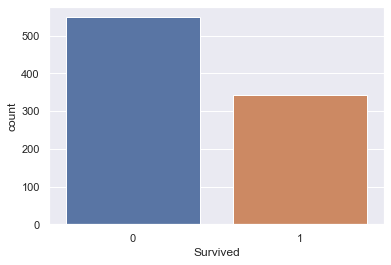

In [11]:
sns.countplot(x='Survived',data=train)

In [12]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

#### Let's create a null accuracy model to go with the majority class (not survived)

In [14]:
549/891

0.6161616161616161

### Null Accuracy is 61.6%

In [15]:
test['Survived'] = 0

test[['PassengerId','Survived']].to_csv('dataset/no_survivors.csv',index=False)

In [17]:
ls dataset/

DecisionTreeVisualization.ipynb  iris.csv
Facebook_Ads_2.csv*              kyphosis.csv*
advertising.csv*                 loan_data.csv*
boston.csv                       no_survivors.csv
creditcard.csv*                  titan/
diabetes.csv                     women_survive.csv
emails.csv*


## Kaggle Baseline Accuracy = 0.62679

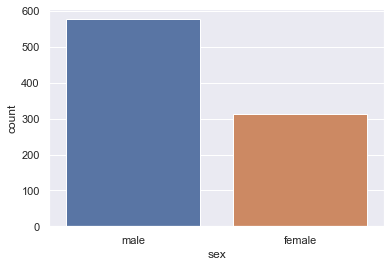

In [20]:
sns.countplot(x='sex',data=train)

/Users/vipulgaur/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


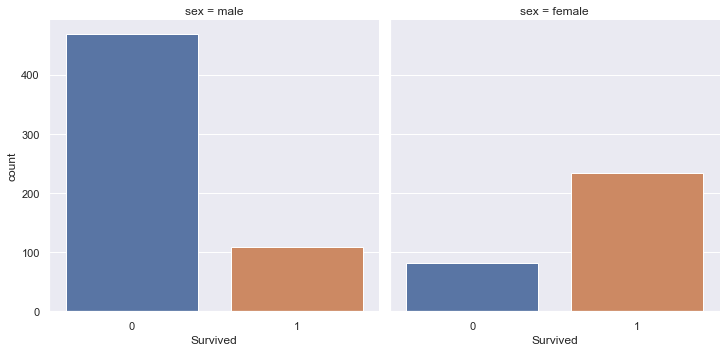

In [21]:
sns.factorplot(x='Survived',col='sex',kind='count',data=train)

In [22]:
train.groupby('sex').Survived.sum()

sex
female    233
male      109
Name: Survived, dtype: int64

In [25]:
test['Survived'] = test.sex == 'female'
test['Survived'] = test.Survived.apply(lambda x: int(x))


test

PassengerId  Pclass                                          name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        sex   age  SibSp  parch              ticket      fare cabin embarked  \
0      male  34.5      0      0              330911    7.8292   NaN        Q   
1    female  47.0      1      0              363272    7.0000   NaN        S   
2      male  62.0      0      0              240276    9.6875   NaN        Q   
3      male  27.0      0      0              315154    8.6625   NaN        S   
4    female  22.0      1      1             3101298   12.2875   NaN        S   
..      ...   ...    ...    ...                 ...       ...   ...      ...   
413    male   NaN      0      0           A.5. 3236    8.0500   NaN        S   
414  female  39.0      0      0            PC 17758  108.9000  C105        C   
415    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S   
416    male   NaN      0      0              359309    8.0500   NaN        S   
417    male   NaN      1      1                2668   22.3583   NaN        C   

     Survived  
0           0  
1           1  
2           0  
3           0  
4           1  
..        ...  
413         0  
414         1  
415         0  
416         0  
417         0  

[418 rows x 12 columns]

In [27]:
test[['PassengerId',"Survived"]].to_csv('second_submission.csv',index=False)

### Now baseline null accuracy is 0.76555
# Great Job !!